# Reddit Scrape
Rayden Lizan - S14

`Psaw` is installed

In [1]:
from psaw import PushshiftAPI
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

## Getting Data

Initializing a new PushshiftAPI for reddit scraping

In [2]:
api = PushshiftAPI()

Making a reddit-scrape-to-dataframe function, where you input the subreddit, start date, end date, maximum number of results and scrapetime. Function returns results in a DataFrame.

In [3]:
def redditToDT(subreddit, start, end, maxresults, scrapetime):
    results = pd.DataFrame(api.search_submissions(
                                after=start,
                                before=end,
                                subreddit=subreddit,
                                filter=['full_link','author', 'title', 'selftext', 'subreddit'],
                                limit=maxresults))
    

    results['scrapetime'] = scrapetime
    
    results['created_utc'] = pd.to_datetime(results['created_utc'], utc=True, unit='s')
    results = results.drop(columns=['d_', 'created'])
    
    
    return results

Initializing variables to input into the function.

In [4]:
start = int(dt.datetime(2022, 1, 1).timestamp())
end = int(dt.datetime(2022, 6, 1).timestamp())
subreddit = 'Minecraft'
scrapetime = dt.datetime.now()
maxresults = 300

Calling the function.

In [5]:
results = redditToDT(subreddit, start, end, maxresults, scrapetime)
results

,author,created_utc,full_link,selftext,subreddit,title,scrapetime
0,Thunderclap222333,2022-05-31 15:58:50+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,,Minecraft,Day one of creating DnD Dream SMP members,2022-06-29 11:23:13.069245
1,SMH_My_Head,2022-05-31 15:58:08+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,,Minecraft,me trying to place the Glazed terracotta IRL,2022-06-29 11:23:13.069245
2,rDunneWortel,2022-05-31 15:57:26+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,,Minecraft,Started a new hardcore after 10 minutes I came...,2022-06-29 11:23:13.069245
3,I-am-reddit123,2022-05-31 15:56:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,it keeps giving me the error of clear up space...,Minecraft,need help with minecraft on my Nintendo switch,2022-06-29 11:23:13.069245
4,rDunneWortel,2022-05-31 15:55:35+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,I was mining down when I came across this beau...,Minecraft,Great start,2022-06-29 11:23:13.069245
...,...,...,...,...,...,...,...
295,_Cianoo,2022-05-31 03:22:58+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,,Minecraft,"I made a castle modeled off of Vaders Castle, ...",2022-06-29 11:23:13.069245
296,fitboy15,2022-05-31 03:20:23+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,,Minecraft,1.18.2 I obtained all music discs and mob heads,2022-06-29 11:23:13.069245
297,code_lazar420,2022-05-31 03:20:20+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,,Minecraft,Paper end crystal I made for my friends birthday,2022-06-29 11:23:13.069245
298,Fede7044,2022-05-31 03:18:26+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,,Minecraft,Playing with resource and behavior packs,2022-06-29 11:23:13.069245


## Preprocessing and analyzing data

Removing any post with no text

In [6]:
minecraftRedditDF = results[results['selftext'].str.len() > 0]
minecraftRedditDF

,author,created_utc,full_link,selftext,subreddit,title,scrapetime
3,I-am-reddit123,2022-05-31 15:56:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,it keeps giving me the error of clear up space...,Minecraft,need help with minecraft on my Nintendo switch,2022-06-29 11:23:13.069245
4,rDunneWortel,2022-05-31 15:55:35+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,I was mining down when I came across this beau...,Minecraft,Great start,2022-06-29 11:23:13.069245
5,z2_smartypants039,2022-05-31 15:52:42+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,So what if instead of the sculk having a separ...,Minecraft,"An Idea for the sculk ""dimension""",2022-06-29 11:23:13.069245
6,LeonardoCouto,2022-05-31 15:48:27+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"So, for context, I'm starting to study Geology...",Minecraft,TIL Minecraft's ore formation... is not as wac...,2022-06-29 11:23:13.069245
9,ERNerdboi,2022-05-31 15:40:01+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,Hey everyone I just got the Craftee crafting d...,Minecraft,Craftee crafting guide?,2022-06-29 11:23:13.069245
...,...,...,...,...,...,...,...
273,litillllleboy,2022-05-31 04:21:46+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,[removed],Minecraft,idk if this is the right place but if you guys...,2022-06-29 11:23:13.069245
277,Siriusgames97,2022-05-31 04:10:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"Im underground, and my water just froze. does ...",Minecraft,Does anyone know how this happened?,2022-06-29 11:23:13.069245
280,Damightyreader,2022-05-31 03:56:19+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"Any really, I heard minecolonies and LOTR are ...",Minecraft,What are the best mods/modpacks to play solo?,2022-06-29 11:23:13.069245
282,Honeymoon_Mindset,2022-05-31 03:50:39+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,[removed],Minecraft,Just be Silly!,2022-06-29 11:23:13.069245


Removing all posts with the keyword `[removed]`

In [7]:
minecraftRedditDF = minecraftRedditDF[minecraftRedditDF['selftext'] != '[removed]']
minecraftRedditDF

,author,created_utc,full_link,selftext,subreddit,title,scrapetime
3,I-am-reddit123,2022-05-31 15:56:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,it keeps giving me the error of clear up space...,Minecraft,need help with minecraft on my Nintendo switch,2022-06-29 11:23:13.069245
4,rDunneWortel,2022-05-31 15:55:35+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,I was mining down when I came across this beau...,Minecraft,Great start,2022-06-29 11:23:13.069245
5,z2_smartypants039,2022-05-31 15:52:42+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,So what if instead of the sculk having a separ...,Minecraft,"An Idea for the sculk ""dimension""",2022-06-29 11:23:13.069245
6,LeonardoCouto,2022-05-31 15:48:27+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"So, for context, I'm starting to study Geology...",Minecraft,TIL Minecraft's ore formation... is not as wac...,2022-06-29 11:23:13.069245
9,ERNerdboi,2022-05-31 15:40:01+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,Hey everyone I just got the Craftee crafting d...,Minecraft,Craftee crafting guide?,2022-06-29 11:23:13.069245
...,...,...,...,...,...,...,...
268,Gangsta_PlayzTTV,2022-05-31 04:31:21+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,Overall theme: There will be 4 continent sized...,Minecraft,My idea of a Minecraft Civlization: Modern War...,2022-06-29 11:23:13.069245
271,houinator,2022-05-31 04:26:08+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,My son downloaded a bunch of stuff from the ma...,Minecraft,Does anyone know where on your PC content from...,2022-06-29 11:23:13.069245
277,Siriusgames97,2022-05-31 04:10:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"Im underground, and my water just froze. does ...",Minecraft,Does anyone know how this happened?,2022-06-29 11:23:13.069245
280,Damightyreader,2022-05-31 03:56:19+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"Any really, I heard minecolonies and LOTR are ...",Minecraft,What are the best mods/modpacks to play solo?,2022-06-29 11:23:13.069245


Formatting all full text to lower case

In [8]:
minecraftRedditDF['Preprocessed post'] = minecraftRedditDF['selftext'].str.lower()
minecraftRedditDF

<ipython-input-8-7205f8d18f83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minecraftRedditDF['Preprocessed post'] = minecraftRedditDF['selftext'].str.lower()


,author,created_utc,full_link,selftext,subreddit,title,scrapetime,Preprocessed post
3,I-am-reddit123,2022-05-31 15:56:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,it keeps giving me the error of clear up space...,Minecraft,need help with minecraft on my Nintendo switch,2022-06-29 11:23:13.069245,it keeps giving me the error of clear up space...
4,rDunneWortel,2022-05-31 15:55:35+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,I was mining down when I came across this beau...,Minecraft,Great start,2022-06-29 11:23:13.069245,i was mining down when i came across this beau...
5,z2_smartypants039,2022-05-31 15:52:42+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,So what if instead of the sculk having a separ...,Minecraft,"An Idea for the sculk ""dimension""",2022-06-29 11:23:13.069245,so what if instead of the sculk having a separ...
6,LeonardoCouto,2022-05-31 15:48:27+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"So, for context, I'm starting to study Geology...",Minecraft,TIL Minecraft's ore formation... is not as wac...,2022-06-29 11:23:13.069245,"so, for context, i'm starting to study geology..."
9,ERNerdboi,2022-05-31 15:40:01+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,Hey everyone I just got the Craftee crafting d...,Minecraft,Craftee crafting guide?,2022-06-29 11:23:13.069245,hey everyone i just got the craftee crafting d...
...,...,...,...,...,...,...,...,...
268,Gangsta_PlayzTTV,2022-05-31 04:31:21+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,Overall theme: There will be 4 continent sized...,Minecraft,My idea of a Minecraft Civlization: Modern War...,2022-06-29 11:23:13.069245,overall theme: there will be 4 continent sized...
271,houinator,2022-05-31 04:26:08+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,My son downloaded a bunch of stuff from the ma...,Minecraft,Does anyone know where on your PC content from...,2022-06-29 11:23:13.069245,my son downloaded a bunch of stuff from the ma...
277,Siriusgames97,2022-05-31 04:10:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"Im underground, and my water just froze. does ...",Minecraft,Does anyone know how this happened?,2022-06-29 11:23:13.069245,"im underground, and my water just froze. does ..."
280,Damightyreader,2022-05-31 03:56:19+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"Any really, I heard minecolonies and LOTR are ...",Minecraft,What are the best mods/modpacks to play solo?,2022-06-29 11:23:13.069245,"any really, i heard minecolonies and lotr are ..."


Applying regex to remove all non-alphanumeric symbols

In [9]:
minecraftRedditDF['Preprocessed post'] = minecraftRedditDF['Preprocessed post'].str.replace('[^a-zA-Z0-9]', ' ', regex=True).str.strip()
minecraftRedditDF

<ipython-input-9-12a0d77d44f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minecraftRedditDF['Preprocessed post'] = minecraftRedditDF['Preprocessed post'].str.replace('[^a-zA-Z0-9]', ' ', regex=True).str.strip()


,author,created_utc,full_link,selftext,subreddit,title,scrapetime,Preprocessed post
3,I-am-reddit123,2022-05-31 15:56:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,it keeps giving me the error of clear up space...,Minecraft,need help with minecraft on my Nintendo switch,2022-06-29 11:23:13.069245,it keeps giving me the error of clear up space...
4,rDunneWortel,2022-05-31 15:55:35+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,I was mining down when I came across this beau...,Minecraft,Great start,2022-06-29 11:23:13.069245,i was mining down when i came across this beau...
5,z2_smartypants039,2022-05-31 15:52:42+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,So what if instead of the sculk having a separ...,Minecraft,"An Idea for the sculk ""dimension""",2022-06-29 11:23:13.069245,so what if instead of the sculk having a separ...
6,LeonardoCouto,2022-05-31 15:48:27+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"So, for context, I'm starting to study Geology...",Minecraft,TIL Minecraft's ore formation... is not as wac...,2022-06-29 11:23:13.069245,so for context i m starting to study geology...
9,ERNerdboi,2022-05-31 15:40:01+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,Hey everyone I just got the Craftee crafting d...,Minecraft,Craftee crafting guide?,2022-06-29 11:23:13.069245,hey everyone i just got the craftee crafting d...
...,...,...,...,...,...,...,...,...
268,Gangsta_PlayzTTV,2022-05-31 04:31:21+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,Overall theme: There will be 4 continent sized...,Minecraft,My idea of a Minecraft Civlization: Modern War...,2022-06-29 11:23:13.069245,overall theme there will be 4 continent sized...
271,houinator,2022-05-31 04:26:08+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,My son downloaded a bunch of stuff from the ma...,Minecraft,Does anyone know where on your PC content from...,2022-06-29 11:23:13.069245,my son downloaded a bunch of stuff from the ma...
277,Siriusgames97,2022-05-31 04:10:10+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"Im underground, and my water just froze. does ...",Minecraft,Does anyone know how this happened?,2022-06-29 11:23:13.069245,im underground and my water just froze does ...
280,Damightyreader,2022-05-31 03:56:19+00:00,https://www.reddit.com/r/Minecraft/comments/v1...,"Any really, I heard minecolonies and LOTR are ...",Minecraft,What are the best mods/modpacks to play solo?,2022-06-29 11:23:13.069245,any really i heard minecolonies and lotr are ...


Saving results into json format

In [10]:
minecraftRedditDF.to_json('Lizan_API.json')

Reading json file

In [11]:
minecraftRedditDF = pd.read_json('Lizan_API.json') 

## Show the scraped data's frequency

In [12]:
frequencywords = pd.DataFrame(' '.join(minecraftRedditDF['Preprocessed post']).split()).value_counts()[:10]
frequencywords

the    204
i      197
to     161
it     143
a      141
and    140
of      76
is      65
for     59
on      58
dtype: int64

# The most popular word is `the` followed by `i`

<AxesSubplot:xlabel='0'>

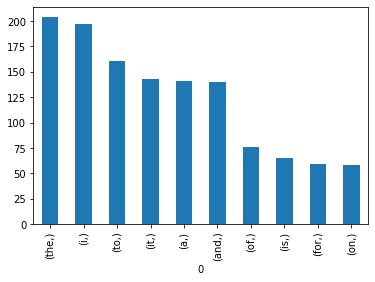

In [13]:
frequencywords.plot.bar()